In [1]:
# import libaries
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Import and Clean Data

In [2]:
# load csv file into df and get overview of it
df = pd.read_csv('sales.csv')
pd.set_option('display.max_columns', 100)
df.info()

C:\Users\H410\AppData\Local\Temp\ipykernel_14984\1098912847.py:2: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Data/sales.csv')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286392 entries, 0 to 286391
Data columns (total 36 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   order_id          286392 non-null  object 
 1   order_date        286392 non-null  object 
 2   status            286392 non-null  object 
 3   item_id           286392 non-null  int64  
 4   sku               286392 non-null  object 
 5   qty_ordered       286392 non-null  int64  
 6   price             286392 non-null  float64
 7   value             286392 non-null  float64
 8   discount_amount   286392 non-null  float64
 9   total             286392 non-null  float64
 10  category          286392 non-null  object 
 11  payment_method    286392 non-null  object 
 12  bi_st             286392 non-null  object 
 13  cust_id           286392 non-null  int64  
 14  year              286392 non-null  int64  
 15  month             286392 non-null  object 
 16  ref_num           28

In [3]:
df.head()

,order_id,order_date,status,item_id,sku,qty_ordered,price,value,discount_amount,total,category,payment_method,bi_st,cust_id,year,month,ref_num,Name Prefix,First Name,Middle Initial,Last Name,Gender,age,full_name,E Mail,Customer Since,SSN,Phone No.,Place Name,County,City,State,Zip,Region,User Name,Discount_Percent
0,100354678,10/1/2020,received,574772,oasis_Oasis-064-36,20,89.9,1798.0,0.0,1798.0,Men's Fashion,cod,Valid,60124,2020,Oct-20,987867,Drs.,Jani,W,Titus,F,43,"Titus, Jani",jani.titus@gmail.com,8/22/2006,627-31-5251,405-959-1129,Vinson,Harmon,Vinson,OK,73571,South,jwtitus,0.0
1,100354678,10/1/2020,received,574774,Fantastic_FT-48,10,19.0,190.0,0.0,190.0,Men's Fashion,cod,Valid,60124,2020,Oct-20,987867,Drs.,Jani,W,Titus,F,43,"Titus, Jani",jani.titus@gmail.com,8/22/2006,627-31-5251,405-959-1129,Vinson,Harmon,Vinson,OK,73571,South,jwtitus,0.0
2,100354680,10/1/2020,complete,574777,mdeal_DMC-610-8,8,149.9,1199.2,0.0,1199.2,Men's Fashion,cod,Net,60124,2020,Oct-20,987867,Drs.,Jani,W,Titus,F,43,"Titus, Jani",jani.titus@gmail.com,8/22/2006,627-31-5251,405-959-1129,Vinson,Harmon,Vinson,OK,73571,South,jwtitus,0.0
3,100354680,10/1/2020,complete,574779,oasis_Oasis-061-36,8,79.9,639.2,0.0,639.2,Men's Fashion,cod,Net,60124,2020,Oct-20,987867,Drs.,Jani,W,Titus,F,43,"Titus, Jani",jani.titus@gmail.com,8/22/2006,627-31-5251,405-959-1129,Vinson,Harmon,Vinson,OK,73571,South,jwtitus,0.0
4,100367357,11/13/2020,received,595185,MEFNAR59C38B6CA08CD,1,99.9,99.9,0.0,99.9,Men's Fashion,cod,Valid,60124,2020,Nov-20,987867,Drs.,Jani,W,Titus,F,43,"Titus, Jani",jani.titus@gmail.com,8/22/2006,627-31-5251,405-959-1129,Vinson,Harmon,Vinson,OK,73571,South,jwtitus,0.0


In [4]:
# check and drop duplicates
print(df.duplicated().sum())
df = df.drop_duplicates()
print(df.duplicated().sum())

0
0


In [5]:
# filter for necessary columns
df = df[['order_id', 'order_date', 'cust_id', 'Customer Since', 'qty_ordered', 'price', 'value', 'discount_amount', 'total']]
df.head(10)

,order_id,order_date,cust_id,Customer Since,qty_ordered,price,value,discount_amount,total
0,100354678,10/1/2020,60124,8/22/2006,20,89.9,1798.0,0.0,1798.0
1,100354678,10/1/2020,60124,8/22/2006,10,19.0,190.0,0.0,190.0
2,100354680,10/1/2020,60124,8/22/2006,8,149.9,1199.2,0.0,1199.2
3,100354680,10/1/2020,60124,8/22/2006,8,79.9,639.2,0.0,639.2
4,100367357,11/13/2020,60124,8/22/2006,1,99.9,99.9,0.0,99.9
5,100367357,11/13/2020,60124,8/22/2006,1,39.9,39.9,0.0,39.9
6,100367360,11/13/2020,60124,8/22/2006,1,47.6,47.6,0.0,47.6
7,100354677,10/1/2020,42485,2/4/1981,1,49.0,49.0,0.0,49.0
8,100354677,10/1/2020,42485,2/4/1981,1,135.0,135.0,0.0,135.0
9,100354677,10/1/2020,42485,2/4/1981,1,549.9,549.9,0.0,549.9


In [6]:
# filter columns again to keep most relevant columns
df = df.drop(columns=['price', 'value', 'discount_amount'])
df.head(10)

,order_id,order_date,cust_id,Customer Since,qty_ordered,total
0,100354678,10/1/2020,60124,8/22/2006,20,1798.0
1,100354678,10/1/2020,60124,8/22/2006,10,190.0
2,100354680,10/1/2020,60124,8/22/2006,8,1199.2
3,100354680,10/1/2020,60124,8/22/2006,8,639.2
4,100367357,11/13/2020,60124,8/22/2006,1,99.9
5,100367357,11/13/2020,60124,8/22/2006,1,39.9
6,100367360,11/13/2020,60124,8/22/2006,1,47.6
7,100354677,10/1/2020,42485,2/4/1981,1,49.0
8,100354677,10/1/2020,42485,2/4/1981,1,135.0
9,100354677,10/1/2020,42485,2/4/1981,1,549.9


In [7]:
# format data type of order_date and 'Customer Since' from object to datetime
df['order_date'] = pd.to_datetime(df['order_date'], format='%m/%d/%Y')
df['Customer Since'] = pd.to_datetime(df['Customer Since'], format='%m/%d/%Y')

# change data type of quantity from float to int
df['qty_ordered'] = df['qty_ordered'].astype('int64')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286392 entries, 0 to 286391
Data columns (total 6 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   order_id        286392 non-null  object        
 1   order_date      286392 non-null  datetime64[ns]
 2   cust_id         286392 non-null  int64         
 3   Customer Since  286392 non-null  datetime64[ns]
 4   qty_ordered     286392 non-null  int64         
 5   total           286392 non-null  float64       
dtypes: datetime64[ns](2), float64(1), int64(2), object(1)
memory usage: 13.1+ MB


In [8]:
# change columns name to be more understsandable
df.columns = ['OrderId', 'OrderDate', 'CustomerId', 'CustomerSince', 'Quantity', 'Sales']
df.head(10)

,OrderId,OrderDate,CustomerId,CustomerSince,Quantity,Sales
0,100354678,2020-10-01,60124,2006-08-22,20,1798.0
1,100354678,2020-10-01,60124,2006-08-22,10,190.0
2,100354680,2020-10-01,60124,2006-08-22,8,1199.2
3,100354680,2020-10-01,60124,2006-08-22,8,639.2
4,100367357,2020-11-13,60124,2006-08-22,1,99.9
5,100367357,2020-11-13,60124,2006-08-22,1,39.9
6,100367360,2020-11-13,60124,2006-08-22,1,47.6
7,100354677,2020-10-01,42485,1981-02-04,1,49.0
8,100354677,2020-10-01,42485,1981-02-04,1,135.0
9,100354677,2020-10-01,42485,1981-02-04,1,549.9


In [9]:
# get statistic summary of all columns
df.describe(include='all')

,OrderId,OrderDate,CustomerId,CustomerSince,Quantity,Sales
count,286392.0,286392,286392.000000,286392,286392.000000,286392.000000
unique,201716.0,NaN,NaN,NaN,NaN,NaN
top,100476608.0,NaN,NaN,NaN,NaN,NaN
freq,43.0,NaN,NaN,NaN,NaN,NaN
mean,NaN,2021-03-12 11:18:32.008715264,70048.019054,2007-10-09 10:05:37.283164160,2.011296,815.840507
min,NaN,2020-10-01 00:00:00,4.000000,1978-11-04 00:00:00,0.000000,0.000000
25%,NaN,2020-12-24 00:00:00,56519.000000,2002-08-24 00:00:00,1.000000,49.900000
50%,NaN,2021-03-16 00:00:00,74225.500000,2010-03-22 00:00:00,1.000000,149.800000
75%,NaN,2021-05-18 00:00:00,92357.000000,2015-01-03 00:00:00,2.000000,800.000000
max,NaN,2021-09-30 00:00:00,115326.000000,2017-07-28 00:00:00,500.000000,101262.590000


In [10]:
# let's group by OrderId, CustomerId since each OrderId consists of many items and each row represents an item (item id)
# OrderDate are also added for assigning cohorts later
da = pd.DataFrame(df.groupby(['OrderDate', 'OrderId', 'CustomerId']).agg({'CustomerSince': min, 'Quantity': sum, 'Sales': sum})).reset_index()
print('Shape is ', da.shape)
da.head(10)

C:\Users\H410\AppData\Local\Temp\ipykernel_14984\3213887248.py:3: FutureWarning: The provided callable <built-in function min> is currently using SeriesGroupBy.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.
  da = pd.DataFrame(df.groupby(['OrderDate', 'OrderId', 'CustomerId']).agg({'CustomerSince': min, 'Quantity': sum, 'Sales': sum})).reset_index()


Shape is  (201716, 6)


C:\Users\H410\AppData\Local\Temp\ipykernel_14984\3213887248.py:3: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  da = pd.DataFrame(df.groupby(['OrderDate', 'OrderId', 'CustomerId']).agg({'CustomerSince': min, 'Quantity': sum, 'Sales': sum})).reset_index()


,OrderDate,OrderId,CustomerId,CustomerSince,Quantity,Sales
0,2020-10-01,100354677,42485,1981-02-04,3,733.9
1,2020-10-01,100354678,60124,2006-08-22,30,1988.0
2,2020-10-01,100354679,53620,2010-06-27,2,306.5
3,2020-10-01,100354680,60124,2006-08-22,16,1838.4
4,2020-10-01,100354681,56836,1992-04-03,1,1099.9
5,2020-10-01,100354682,56836,1992-04-03,1,1099.9
6,2020-10-01,100354683,60125,2015-06-21,3,510.0
7,2020-10-01,100354684,56836,1992-04-03,1,1099.9
8,2020-10-01,100354685,51286,2016-10-19,1,3139.2
9,2020-10-01,100354686,60126,2011-07-10,1,315.2


# 2. Assign Cohorts to Data

In [11]:
# add new columns - OrderMonth and YearAcquired
da['OrderMonth'] = da['OrderDate'].dt.to_period('M')
da['YearAcquired'] = da['CustomerSince'].dt.to_period('Y')
da.head()

,OrderDate,OrderId,CustomerId,CustomerSince,Quantity,Sales,OrderMonth,YearAcquired
0,2020-10-01,100354677,42485,1981-02-04,3,733.9,2020-10,1981
1,2020-10-01,100354678,60124,2006-08-22,30,1988.0,2020-10,2006
2,2020-10-01,100354679,53620,2010-06-27,2,306.5,2020-10,2010
3,2020-10-01,100354680,60124,2006-08-22,16,1838.4,2020-10,2006
4,2020-10-01,100354681,56836,1992-04-03,1,1099.9,2020-10,1992


In [12]:
# as YearAcquired spread too wide, let's create 5-year bins and assign YearAcquired to them
# change datatype of YearAcquired to int for easier acquisition
da.YearAcquired = da.YearAcquired.astype('str')
da.YearAcquired = da.YearAcquired.astype('int64')

da['Cohorts'] = pd.cut(x=da.YearAcquired, bins=list(range(np.min(da.YearAcquired), np.max(da.YearAcquired)+5, 5)))
da.head(10)

,OrderDate,OrderId,CustomerId,CustomerSince,Quantity,Sales,OrderMonth,YearAcquired,Cohorts
0,2020-10-01,100354677,42485,1981-02-04,3,733.9,2020-10,1981,"(1978, 1983]"
1,2020-10-01,100354678,60124,2006-08-22,30,1988.0,2020-10,2006,"(2003, 2008]"
2,2020-10-01,100354679,53620,2010-06-27,2,306.5,2020-10,2010,"(2008, 2013]"
3,2020-10-01,100354680,60124,2006-08-22,16,1838.4,2020-10,2006,"(2003, 2008]"
4,2020-10-01,100354681,56836,1992-04-03,1,1099.9,2020-10,1992,"(1988, 1993]"
5,2020-10-01,100354682,56836,1992-04-03,1,1099.9,2020-10,1992,"(1988, 1993]"
6,2020-10-01,100354683,60125,2015-06-21,3,510.0,2020-10,2015,"(2013, 2018]"
7,2020-10-01,100354684,56836,1992-04-03,1,1099.9,2020-10,1992,"(1988, 1993]"
8,2020-10-01,100354685,51286,2016-10-19,1,3139.2,2020-10,2016,"(2013, 2018]"
9,2020-10-01,100354686,60126,2011-07-10,1,315.2,2020-10,2011,"(2008, 2013]"


# 3. Retention by Cohort

In [13]:
# count distinct customers in each cohort
TotalCustomer = pd.DataFrame(da.groupby('Cohorts', as_index=False).agg({'CustomerId': 'nunique'}))
TotalCustomer.columns = ['Cohorts', 'TotalCustomer']
TotalCustomer

C:\Users\H410\AppData\Local\Temp\ipykernel_14984\352007831.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  TotalCustomer = pd.DataFrame(da.groupby('Cohorts', as_index=False).agg({'CustomerId': 'nunique'}))


,Cohorts,TotalCustomer
0,"(1978, 1983]",648
1,"(1983, 1988]",1891
2,"(1988, 1993]",3393
3,"(1993, 1998]",5074
4,"(1998, 2003]",7261
5,"(2003, 2008]",10583
6,"(2008, 2013]",15527
7,"(2013, 2018]",19865


C:\Users\H410\AppData\Local\Temp\ipykernel_14984\1653717244.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=TotalCustomer, x='Cohorts', y='TotalCustomer', palette='mako')


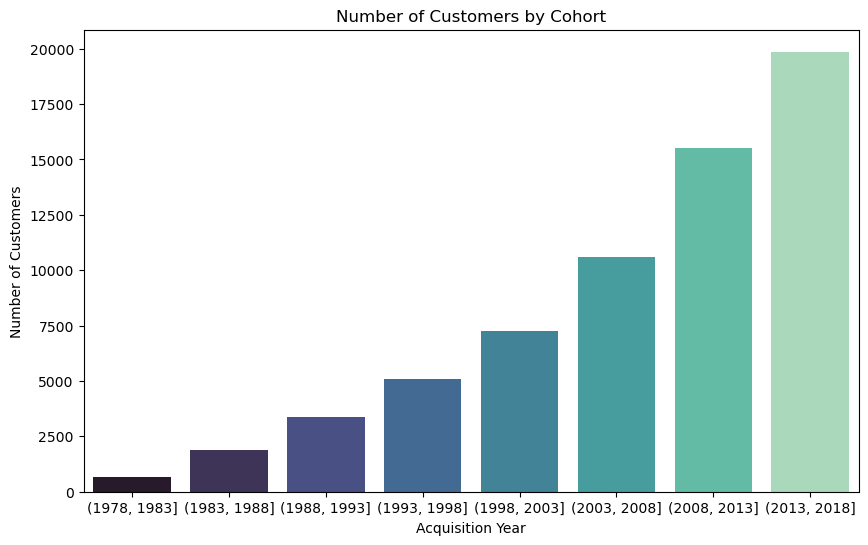

In [14]:
# create a barplot to see the number of unique customer per cohort
fig, ax = plt.subplots(figsize = (10,6))
sns.barplot(data=TotalCustomer, x='Cohorts', y='TotalCustomer', palette='mako')
plt.title('Number of Customers by Cohort')
plt.xlabel('Acquisition Year')
plt.ylabel('Number of Customers')

plt.show()

In [15]:
# create pivot tablee from dataframe and calculate the number of unique customers acquired per month per cohort
CustomerAcquired = pd.pivot_table(da,
                                  index='Cohorts',
                                  columns='OrderMonth',
                                  values='CustomerId',
                                  aggfunc=pd.Series.nunique)

CustomerAcquired

OrderMonth,2020-10,2020-11,2020-12,2021-01,2021-02,2021-03,2021-04,2021-05,2021-06,2021-07,2021-08,2021-09
Cohorts,,,,,,,,,,,,
"(1978, 1983]",32,50,208,54,33,78,139,53,80,33,30,29
"(1983, 1988]",106,155,632,163,91,241,409,148,223,133,98,96
"(1988, 1993]",163,298,1139,282,192,429,739,297,402,198,183,191
"(1993, 1998]",234,412,1758,405,269,649,1139,428,552,302,280,269
"(1998, 2003]",357,624,2471,643,357,871,1649,567,782,450,344,376
"(2003, 2008]",530,844,3565,916,556,1294,2361,952,1156,647,540,577
"(2008, 2013]",772,1333,5199,1255,826,1942,3439,1338,1646,919,793,835
"(2013, 2018]",971,1635,6605,1670,1042,2509,4435,1757,2282,1188,986,1051


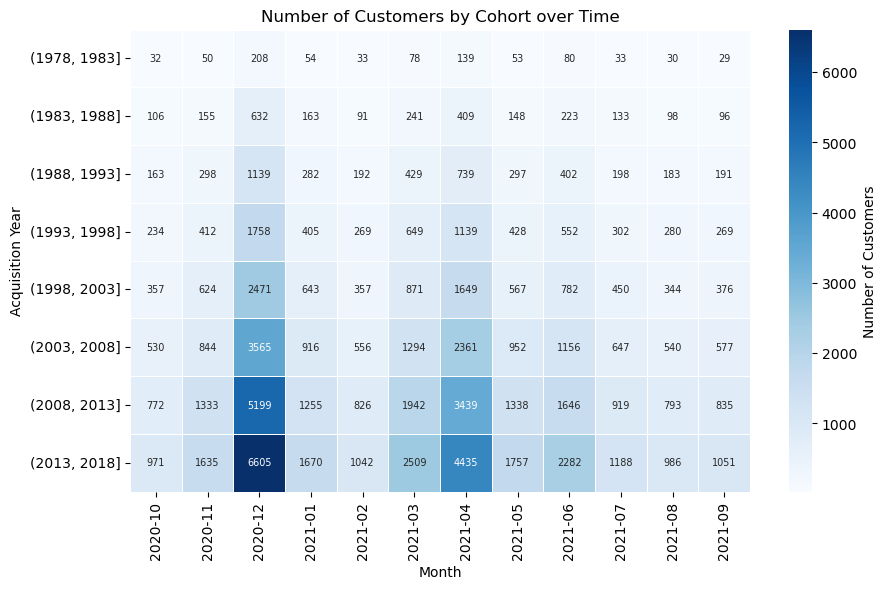

In [32]:
# create a heatmap to see the number of unique customer per cohort over time
fig, ax = plt.subplots(figsize = (10,6))
sns.heatmap(CustomerAcquired, annot=True, annot_kws={'size':7}, fmt='.0f', linewidths=.4, cmap='Blues', cbar_kws={'label': 'Number of Customers'})
plt.title('Number of Customers by Cohort over Time')
plt.xlabel('Month')
plt.ylabel('Acquisition Year')

plt.show()

In [17]:
CustomerAcquiredPct = CustomerAcquired.div(TotalCustomer.iloc[:,1].values, axis=0)
CustomerAcquiredPct

OrderMonth,2020-10,2020-11,2020-12,2021-01,2021-02,2021-03,2021-04,2021-05,2021-06,2021-07,2021-08,2021-09
Cohorts,,,,,,,,,,,,
"(1978, 1983]",0.049383,0.077160,0.320988,0.083333,0.050926,0.120370,0.214506,0.081790,0.123457,0.050926,0.046296,0.044753
"(1983, 1988]",0.056055,0.081967,0.334215,0.086198,0.048123,0.127446,0.216288,0.078265,0.117927,0.070333,0.051824,0.050767
"(1988, 1993]",0.048040,0.087828,0.335691,0.083112,0.056587,0.126437,0.217801,0.087533,0.118479,0.058355,0.053935,0.056292
"(1993, 1998]",0.046117,0.081198,0.346472,0.079819,0.053015,0.127907,0.224478,0.084352,0.108790,0.059519,0.055183,0.053015
"(1998, 2003]",0.049167,0.085939,0.340311,0.088555,0.049167,0.119956,0.227104,0.078088,0.107699,0.061975,0.047376,0.051784
"(2003, 2008]",0.050080,0.079751,0.336861,0.086554,0.052537,0.122272,0.223094,0.089956,0.109232,0.061136,0.051025,0.054521
"(2008, 2013]",0.049720,0.085850,0.334836,0.080827,0.053198,0.125072,0.221485,0.086172,0.106009,0.059187,0.051072,0.053777
"(2013, 2018]",0.048880,0.082306,0.332494,0.084067,0.052454,0.126303,0.223257,0.088447,0.114875,0.059804,0.049635,0.052907


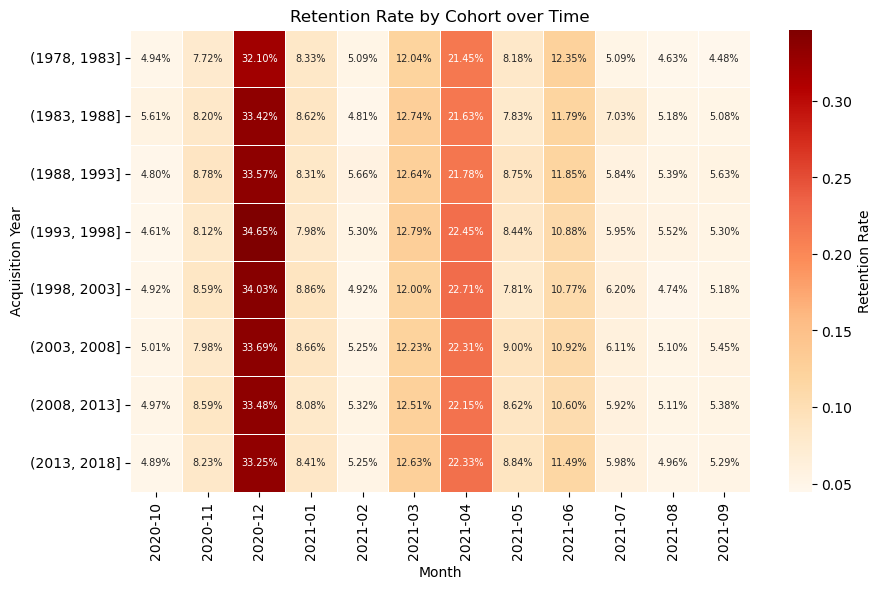

In [18]:
# create a heatmap to see retention rate of customers by cohort over time
fig, ax = plt.subplots(figsize = (10, 6))
sns.heatmap(CustomerAcquiredPct, annot=True, annot_kws={"size": 7}, fmt=".2%", linewidths = .4, cmap="OrRd", cbar_kws={'label': 'Retention Rate'})
plt.title('Retention Rate by Cohort over Time', fontsize = 12)
plt.xlabel('Month')
plt.ylabel('Acquisition Year')

plt.show()

# 4. Quantity and Revenue by Cohort

In [28]:
# create pivot table from dataframe and calculate the average revenue per order per cohort over time
AvgOrderSales = pd.pivot_table(da,
                             index='Cohorts',
                             columns='OrderMonth',
                             values='Sales',
                             aggfunc=pd.Series.mean)

AvgOrderSales

OrderMonth,2020-10,2020-11,2020-12,2021-01,2021-02,2021-03,2021-04,2021-05,2021-06,2021-07,2021-08,2021-09
Cohorts,,,,,,,,,,,,
"(1978, 1983]",570.413204,955.347296,976.237896,384.509469,837.643209,1560.284642,1052.027453,1327.428274,1140.401328,1462.012308,1150.683630,1158.581162
"(1983, 1988]",507.662264,925.942272,1053.906905,475.797419,571.294689,1351.021447,1026.870064,836.777457,1382.910825,2211.039693,1970.804719,975.892765
"(1988, 1993]",733.559000,958.046404,1044.762258,749.561980,860.415863,1630.534582,1130.686861,1267.282653,1819.696230,3090.096674,4661.612238,1674.687107
"(1993, 1998]",590.606603,751.695358,1077.592000,721.322600,706.528853,1575.272944,1007.726916,1066.937058,1444.170703,2403.820397,2834.005619,1100.108024
"(1998, 2003]",1075.609982,946.139484,1002.849379,583.990475,660.386866,1349.584062,1083.117552,1249.320949,1386.197522,1287.391956,2447.715308,1423.313001
"(2003, 2008]",828.799188,1041.053632,1050.916756,614.080413,640.442606,1320.160389,1025.087601,1026.410470,1261.895778,2102.306279,1183.882817,1846.195750
"(2008, 2013]",651.677324,901.296147,1018.162076,676.541418,631.766100,1317.226402,1068.580669,963.514376,1080.556542,1678.978436,2500.695970,1512.467744
"(2013, 2018]",1029.149749,849.913606,999.673071,673.728790,691.731343,1255.864720,1032.445213,877.666774,1219.433142,1875.054314,3219.541662,1093.803143


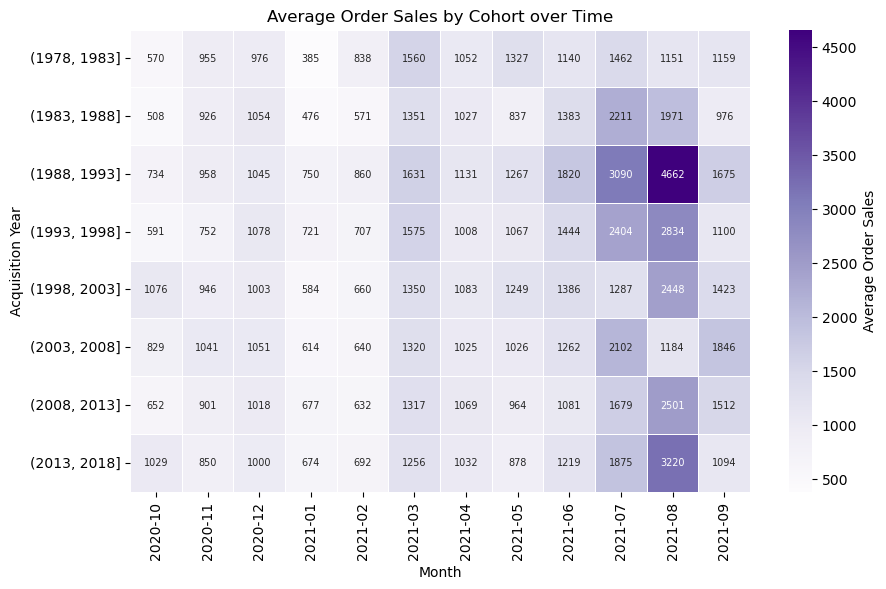

In [31]:
# create a heatmap to see the average revenue per cohort over time
fig, ax = plt.subplots(figsize = (10, 6))
sns.heatmap(AvgOrderSales, annot=True, annot_kws={"size": 7}, fmt=".0f", linewidths = .4, cmap="Purples", cbar_kws={'label': 'Average Order Sales'})
plt.title('Average Order Sales by Cohort over Time', fontsize = 12)
plt.xlabel('Month')
plt.ylabel('Acquisition Year')

plt.show()

In [26]:
# create pivot table from dataframe and calculate the order median sales amount per cohort over time
MedOrderSales = pd.pivot_table(da,
                             index='Cohorts',
                             columns='OrderMonth',
                             values='Sales',
                             aggfunc=pd.Series.median)

MedOrderSales

OrderMonth,2020-10,2020-11,2020-12,2021-01,2021-02,2021-03,2021-04,2021-05,2021-06,2021-07,2021-08,2021-09
Cohorts,,,,,,,,,,,,
"(1978, 1983]",279.5,600.00,652.0500,141.550,199.6,500.000,500.0000,250.00,389.877,479.900,375.785,257.4875
"(1983, 1988]",197.5,300.00,581.6550,171.200,194.2,584.750,471.5200,232.50,284.100,166.050,299.800,372.2950
"(1988, 1993]",169.3,458.00,570.0000,240.665,200.0,794.450,500.0000,259.90,307.918,550.000,1017.400,328.1875
"(1993, 1998]",190.0,285.00,498.8625,199.800,169.9,556.250,400.0000,249.50,325.550,337.875,734.500,327.8750
"(1998, 2003]",209.7,318.25,467.9100,181.400,174.8,528.615,400.0000,250.00,317.000,279.800,397.500,337.8750
"(2003, 2008]",189.3,466.07,569.4500,215.680,179.7,506.100,451.4100,199.90,299.800,257.500,199.900,383.0250
"(2008, 2013]",159.9,300.00,469.3600,188.000,159.8,479.900,400.3075,200.00,248.400,299.800,360.200,337.8750
"(2013, 2018]",206.9,300.00,452.5000,197.440,169.8,460.100,407.2500,199.25,249.800,179.900,337.875,297.8000


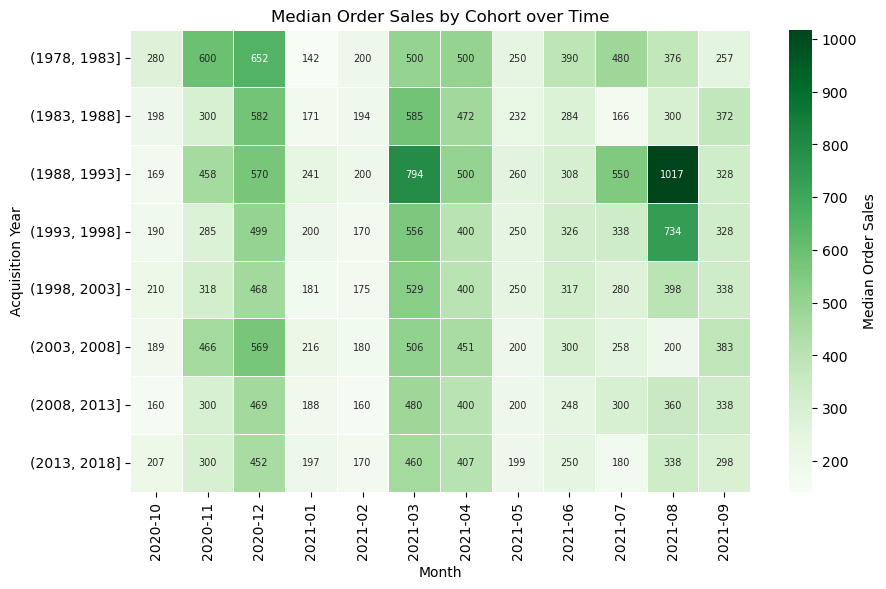

In [30]:
# let's see if customers in certain cohorts spend more money than others
fig, ax = plt.subplots(figsize = (10, 6))
sns.heatmap(MedOrderSales, annot=True, annot_kws={"size": 7}, fmt=".0f", linewidths = .4, cmap="Greens", cbar_kws={'label': 'Median Order Sales'})
plt.title('Median Order Sales by Cohort over Time', fontsize = 12)
plt.xlabel('Month')
plt.ylabel('Acquisition Year')

plt.show()